# Submission Data
- Nama:Fadlan Bahar
- Email:fadlanbahar1@gmail.com
- Id Dicoding: fadlan_bahar_A7yo!

# Menentukan Pertanyaan Bisnis
1. Daerah mana yang merupakan customer terbanyak ?
2. Tipe pembayaran yang paling banyak di lakukan ?

# Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA WRAGLING

### Gathering Data

In [2]:
rel_path = './E-Commerce Public Dataset/customers_dataset.csv'
customerdf = pd.read_csv(rel_path)
customerdf.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
rel_path1 = './E-Commerce Public Dataset/order_payments_dataset.csv'
order_payment = pd.read_csv(rel_path1)
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assesing Data

In [4]:
customerdf.info() #mengecek type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customerdf.isna().sum() #mengecek jumlah missing value

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
print("Jumlah duplikasi data: ", customerdf.duplicated().sum())   #mengecek jumlah duplikasi

Jumlah duplikasi data:  0


In [7]:
customerdf.describe() #mengecek innacurate data

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
order_payment.info() #mengecek type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
order_payment.isna().sum() #mengecek jumlah missing value

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
print("Jumlah duplikasi data: ", order_payment.duplicated().sum())   #mengecek jumlah duplikasi

Jumlah duplikasi data:  0


In [11]:
order_payment.describe() #mengecek innacurate data

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Cleaning Data

In [12]:
customerdf.dropna(inplace=True)
customerdf.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
order_payment.dropna(inplace=True)
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

### EXPLOR...

In [14]:
# Menghitung jumlah customer berdasarkan customer_city
customer_count = customerdf.groupby('customer_city')['customer_id'].nunique().reset_index(name='CustomerCount')
sorted_df = customer_count.sort_values(by='CustomerCount', ascending=False)
top_5 = sorted_df.head(5)
top_5

,customer_city,CustomerCount
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521


In [15]:
# Membuat pivot untuk mengetahui metode pembayaran paling populer atau paling banyak di lakukan
# Menghitung jumlah kemunculan setiap metode pembayaran
payment_counts = order_payment['payment_type'].value_counts()
print(payment_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


# Visualisasi dan Explanatory Data

#### 1. Daerah mana yang merupakan customer terbanyak ?


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19448\2215438630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_city', y='CustomerCount', data=top_5, palette='viridis')


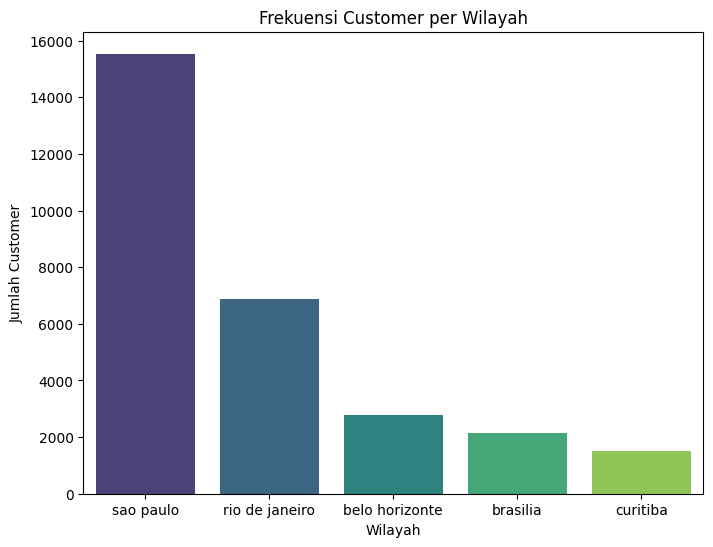

In [16]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='customer_city', y='CustomerCount', data=top_5, palette='viridis')
plt.title('Frekuensi Customer per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Customer')
plt.show()

Grafik diatas menunjukkan lima kota dengan kustomer terbanyak, di mulai dari sao paulo, rio de janeiro, belo horizonte, brasilia dan curitibia.

#### 2. Tipe pembayaran yang paling banyak di lakukan ?

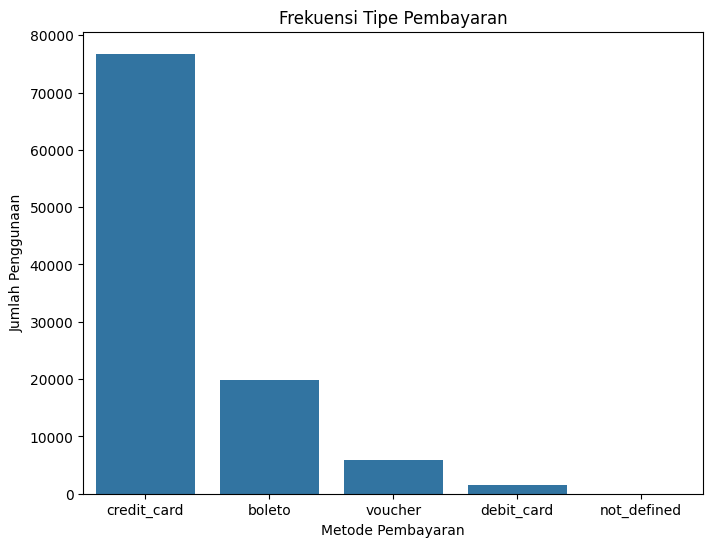

In [17]:
# Visualisasi
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=order_payment, order=order_payment["payment_type"].value_counts().index)
plt.title('Frekuensi Tipe Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penggunaan')
plt.show()

Berdasarkan data diatas urutan pengunaan tipe pembayaran di mulai dari credit card, boleto, voucher, debit card kemudian pembayaran dengan tipe not defined sebagai yang terbawah.

# Conclusion

### 1. Daerah mana yang merupakan customer terbanyak ?

Grafik menunjukkan bahwa daerah sao paulo merupakan daerah dengan customer terbanyak dibandingkan dengan wilayah lainnya. Sebanyak 15.540 customer yang berada di wilayah ini. Berdasrkan hal tersebut perusahaan bisa membuat iklan yang efektif serta tepat pada tempatnya.

## 2.Tipe pembayaran yang paling banyak di lakukan ?

Berdasarkan data diatas, pengunaan credit card sebagai metode pembayaran paling banyak di gunakan. Berdasarkan hal tersebut, kami merekomendasikan bagi perusahaan untuk menyiapkan kemudahan dalam pembayaran credit card. 